### Motivaçao: a biblioteca Pandas é essencialmente utilizada para manipulaçao de dados!

  - Easy handling of missing data in floating point as well as non-floating
    point data.
  - Size mutability: columns can be inserted and deleted from DataFrame and
    higher dimensional objects
  - Automatic and explicit data alignment: objects can be explicitly aligned
    to a set of labels, or the user can simply ignore the labels and let
    `Series`, `DataFrame`, etc. automatically align the data for you in
    computations.
  - Powerful, flexible group by functionality to perform split-apply-combine
    operations on data sets, for both aggregating and transforming data.
  - Make it easy to convert ragged, differently-indexed data in other Python
    and NumPy data structures into DataFrame objects.
  - Intelligent label-based slicing, fancy indexing, and subsetting of large
    data sets.
  - Intuitive merging and joining data sets.
  - Flexible reshaping and pivoting of data sets.
  - Hierarchical labeling of axes (possible to have multiple labels per tick).
  - Robust IO tools for loading data from flat files (CSV and delimited),
    Excel files, databases, and saving/loading data from the ultrafast HDF5
    format.
  - Time series-specific functionality: date range generation and frequency
    conversion, moving window statistics, moving window linear regressions,
    date shifting and lagging, etc.

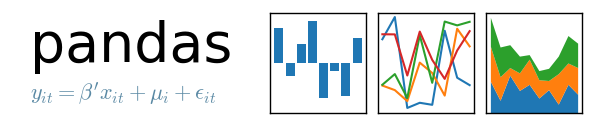

_______________________________________

In [1]:
# Importando a Biblioteca

import pandas as pd

In [2]:
# Lembre-se sempre da documentacao

pd?

_______________________________________

### O pandas possui 3 estruturas principais Series, Data Frame e o Index

In [3]:
# Começando pelo Series -  é praticamente igual ao array do numpy, mas com a diferença fundamento de carregar com si
# os indices customizaveis

serie = pd.Series([1, 2, 3, 4, 5, 6])

serie

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [4]:
# Para acessar um dado dentro do objeto series, é igual ao array

serie[0]

1

In [5]:
# A diferença para o array do numpy é o index - indice
# Pode ser muito util para acessar os dado mais facilmente
# Voltaremos mais a frente com os indicees

serie2 = pd.Series([1, 2, 3, 4, 5, 6], index = ["I","II","III","IV","V","VI"])

serie2


I      1
II     2
III    3
IV     4
V      5
VI     6
dtype: int64

In [6]:
serie2["V"]

5

In [7]:
# Acessando os elementos da serie que sao maiores ou igual a 4

serie2[serie2 >= 4]

IV    4
V     5
VI    6
dtype: int64

In [8]:
serie2[serie2 >= 4]["IV"]

4

In [9]:
# E voce pode converter diferentes objetos em uma serie utilizando o método pd.Series

dic = {"AS": "Brasil","AC": "Mexico","AN": "EUA","EU": "Italia"}

dic_serie = pd.Series(dic)

dic_serie


AS    Brasil
AC    Mexico
AN       EUA
EU    Italia
dtype: object

In [10]:
dic_serie["EU"]

'Italia'

In [11]:
# Inclusive, tal qual um dicionario, voce pode alterar o valor de um elemento dentro da serie via indice!

dic_serie["AN"] = "Canada"

dic_serie

AS    Brasil
AC    Mexico
AN    Canada
EU    Italia
dtype: object

In [12]:
# O data frame - criado com o método pd.DataFrame

import numpy as np

df = pd.DataFrame(np.random.rand(5, 2), columns = ["Rand1", "Rand2"], index = ["I","II","III","IV","V"])

df

,Rand1,Rand2
I,0.975781,0.403071
II,0.605239,0.878734
III,0.230887,0.149539
IV,0.115209,0.588890
V,0.354961,0.045541


In [13]:
# Assim como com as series, outros objetos podem ser convertidos em data frames

df2 = pd.DataFrame(dic_serie, columns = ["Pais"])

df2

,Pais
AS,Brasil
AC,Mexico
AN,Canada
EU,Italia


In [14]:
# Com a propriedade de inspecionar os seus indices

df.index

Index(['I', 'II', 'III', 'IV', 'V'], dtype='object')

In [15]:
# E colunas

df.columns

Index(['Rand1', 'Rand2'], dtype='object')

#### A coisa mais importante que voce precisa entender dos indices

In [16]:
# Indexers: loc e iloc

In [17]:
df["AN"]

KeyError: 'AN'

In [18]:
# Vamos supor que voce queira selecionar a primeira linha do dataframe abaixo

df3 = pd.DataFrame(np.random.rand(5, 2), columns = ["Rand1", "Rand2"])

# Voce vai conseguir assim - e o resultado retornado è um dataframe
df3[0:1]

,Rand1,Rand2
0,0.175802,0.453935


In [19]:
# Mas nao vai conseguir assim

df3[0]

KeyError: 0

In [20]:
# Por isso usamos loc - que vai te retornar os registros como um objeto pandaSeries

df3.loc[0]

Rand1    0.175802
Rand2    0.453935
Name: 0, dtype: float64

In [21]:
type(df3.loc[0])

pandas.core.series.Series

In [22]:
df

,Rand1,Rand2
I,0.975781,0.403071
II,0.605239,0.878734
III,0.230887,0.149539
IV,0.115209,0.588890
V,0.354961,0.045541


In [23]:
# Porem lembra do nosso primeiro dataframe que tinha os indices como string?
# o loc nao funcionarà

df.loc[0]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

In [24]:
# Mas para esses casos voce usa o iloc se quiser acessar o indice "numericamente" se nao souber os nomes 

df.iloc[0]

Rand1    0.975781
Rand2    0.403071
Name: I, dtype: float64

In [25]:
# O loc funcionarà apenas se voce souber o nome dos indices

df.loc["I"]

Rand1    0.975781
Rand2    0.403071
Name: I, dtype: float64

_______________________________________

### A maioria das propriedades como definir tipos de dados, e acessar informaçoes dentro de um dataframe
### sao semelhantes ou identicas às dos arrays

_______________________________________

### Vamos agora aprofundar o estudo do objeto dataframe, que nos ajudara a entender todas as demais propriedades dos indices

_______________________________________

In [ ]:
# Configurando o ambiente de trabalho

# Mostra qual é o diretorio de trabalho atual
import os

# Muda o diretorio de trabalho
os.chdir("C:\\Users\\engle\\OM Na Pratica\\Python\\Bases de Dados")

In [ ]:
# Carregando nossa base de dados

# Facebook Metrics - The data is related to posts' published during the year of 2014 on the Facebook's page 
# of a renowned cosmetics brand.

facebook = pd.read_csv("dataset_Facebook.csv", sep = ";")


In [ ]:
# Inspecionando a base

facebook.head()

In [ ]:
facebook.shape

In [ ]:
# Fazendo um check rapido

facebook.columns

In [ ]:
# Como acessar os dados dentro do dataframe?

# Pelo indice - sim, ele vai funcionar como um array - porque na verdade a estrutura logica dentro do Python é a mesma
# E aqui ele te trarà todas as colunas

facebook[0:3]

In [ ]:
# Pelo nome da coluna - e aqui estou limitando o acesso à apenas os 10 primeiros registros

facebook["Type"][0:10]

In [ ]:
# Pode também pode fazer a selecao dos dados condicionalmente

# Selecionando todo os posts entre 5 e 10 comentarios


comments_5_10 = facebook[(facebook["comment"] >= 5) & (facebook["comment"] <= 10)]

comments_5_10

In [ ]:
# Quantos comentarios sao?

comments_5_10.shape

In [ ]:
# Criando uma nova coluna

# Vamos criar uma nova variavel chamada de engagement

facebook["Engagement"] = facebook["Total Interactions"]/facebook["Lifetime Engaged Users"]

In [ ]:
facebook.columns

In [ ]:
facebook["Engagement"][:10]